In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from pathlib import Path
from sklearn.metrics import r2_score

In [2]:
ROOT_DIR = os.path.dirname(
os.path.dirname(str(Path(os.path.abspath('')).absolute())))

# Load Model

In [3]:
TARGET_NAME = "sim_time/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [4]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models", TARGET_NAME, ENCODING_NAME
)

In [5]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [6]:
X_TRAIN_NAME = "X_train.csv"
y_TRAIN_NAME = "y_train.csv"

In [7]:
X_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", X_TRAIN_NAME), index_col=0)
y_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", y_TRAIN_NAME), index_col=0)

In [8]:
X_TEST_NAME = "X_Structure gen..csv"
y_TEST_NAME = "y_Structure gen..csv"

In [9]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

In [10]:
pred_trees_train = np.array([estimator.predict(X_train) for estimator in model.estimators_]).T

In [11]:
y_pred_train = model.predict(X_train)

In [12]:
np.allclose(np.mean(pred_trees_train, axis=1), y_pred_train)

True

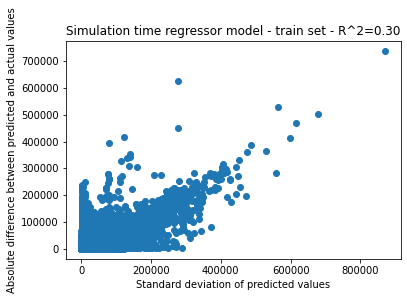

In [13]:
y_pred_train_std = np.std(pred_trees_train, axis=1)
y_dev_train = np.abs(y_pred_train - y_train.values.squeeze())
plt.xlabel("Standard deviation of predicted values")
plt.ylabel("Absolute difference between predicted and actual values")
plt.title(f"Simulation time regressor model - train set - R^2={r2_score(y_pred_train_std, y_dev_train):.2f}")
plt.scatter(y_pred_train_std, y_dev_train)

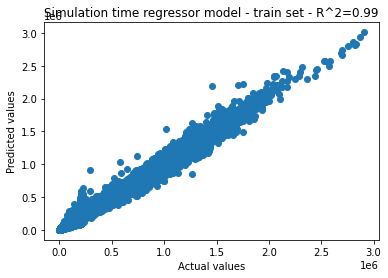

In [14]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Simulation time regressor model - train set - R^2={r2_score(y_pred_train, y_train.values.squeeze()):.2f}")
plt.scatter(y_pred_train, y_train.values.squeeze())

In [15]:
pred_trees_test = np.array([estimator.predict(X_test) for estimator in model.estimators_]).T

In [16]:
y_pred_test = model.predict(X_test)

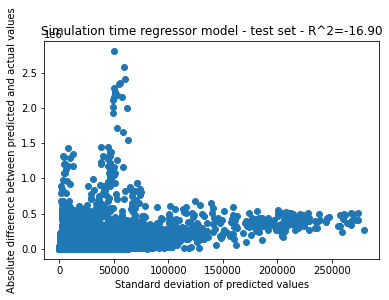

In [17]:
y_pred_test_std = np.std(pred_trees_test, axis=1)
y_dev_test = np.abs(y_pred_test - y_test.values.squeeze())
plt.xlabel("Standard deviation of predicted values")
plt.ylabel("Absolute difference between predicted and actual values")
plt.title(f"Simulation time regressor model - test set - R^2={r2_score(y_pred_test_std, y_dev_test):.2f}")
plt.scatter(y_pred_test_std, y_dev_test)

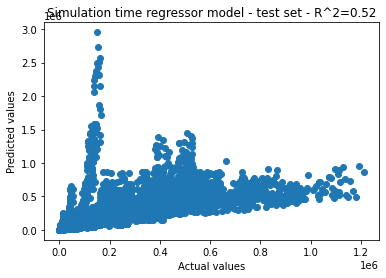

In [19]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Simulation time regressor model - test set - R^2={r2_score(y_pred_test, y_test):.2f}")
plt.scatter(y_pred_test, y_test.values.squeeze())